In [1]:
import sys
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import time
XCr_path = os.getcwd()+'/../'
sys.path.append(XCr_path)
from XCrystal import *
t0=time.time()

In [2]:
omega0 = 14400
delta_omega = 0.0
omega = omega0 * (1 + delta_omega)

In [3]:
xcr = XCrystal(XCr_path+'/config/CrystalC440Fig4.yaml',omega)
pp=xcr.configure(0,0)

In [4]:
def single_realization_with_data(delta_theta,Rock_angle):
    
    xcr = XCrystal(XCr_path+'/config/CrystalC440Fig4.yaml',omega)
    xcr.configure(delta_theta,Rock_angle)
    xcr.run3D()
    
    return xcr.Reflectivity, xcr.Transmission, xcr.U1_field, xcr.U2_field, xcr.u, xcr.M

In [5]:
U1_data = []
U2_data = []

Rs, Ts, U1_xyz, U2_xyz, up, MM = single_realization_with_data(0e-6,0)

U1_data.append(U1_xyz)
U2_data.append(U2_xyz)

U1_xyz = np.asarray(U1_data)
U2_xyz = np.asarray(U2_data)

Omega:  14400.0 ; Reflectivity:  0.035124663958507336 ; Transmission:  0.9586863168475482


In [6]:
xcr.lam,xcr.lam0

(8.610013403419406e-11, 8.610013403419406e-11)

In [7]:
ket12=np.sum(U1_xyz[0,:,0,:]*np.conj(U2_xyz[0,:,0,:]),axis=0)
ket21=np.sum(U2_xyz[0,:,0,:]*np.conj(U1_xyz[0,:,0,:]),axis=0)+1e-15
thet=np.unwrap(np.angle(-ket12/ket21)) # phase difference between U1_xyz and U2_xyz calculatef from energy 

In [8]:
Ints=np.abs(U1_xyz[0,:,0,:] + U2_xyz[0,:,0,:]*np.exp(1j*thet/2))**2
Ints2=np.abs(U1_xyz[0,:,0,:]*0 + U2_xyz[0,:,0,:]*np.exp(1j*thet/2))**2
Ints1=np.abs(U1_xyz[0,:,0,:] + 0.1*U2_xyz[0,:,0,:]*np.exp(1j*thet/2))**2
SumInts=np.abs(U1_xyz[0,:,0,:])**2*20 + np.abs(U2_xyz[0,:,0,:])**2

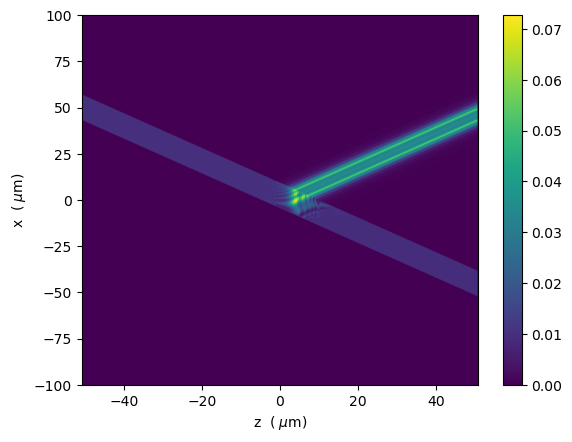

In [9]:
plt.imshow(Ints1**1,extent=[-xcr.M*xcr.Z/xcr.convr*1e6/2,xcr.M*xcr.Z/xcr.convr*1e6/2,-xcr.xx.max()/xcr.convr*1e6,xcr.xx.max()/xcr.convr*1e6], aspect='auto')
#plt.imshow(np.abs(U1_xyz[0,:,0,:])**0.5 + np.abs(U2_xyz[0,:,0,:])**0.5,extent=[0,xcr.M*xcr.Z/xcr.convr*1e6,0,xcr.xx.max()*2/xcr.convr*1e6], aspect='auto',cmap='jet')
#plt.ylim(150, 250)
#plt.xlim(-60,-40)
plt.ylabel(r'x  ( $\mu$m)')
plt.xlabel(r'z  ( $\mu$m)')
plt.colorbar()

In [10]:
t1=time.time()

In [11]:
SumInts=np.abs(U1_xyz[0,:,0,:])**2 + np.abs(U2_xyz[0,:,0,:])**2
En=np.sum(Ints,axis=0) 
EnSumInt=np.sum(SumInts,axis=0) 


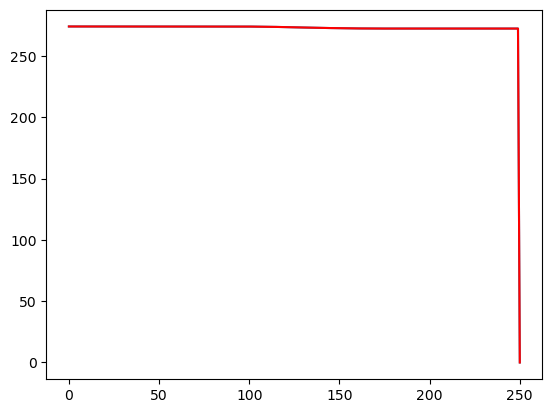

In [12]:
plt.plot(En)
plt.plot((EnSumInt),'r')
#plt.ylim(300,330)
plt.show()
